# Task 7.5: Unsupervised Machine Learning: Clustering

## This script contains the following points:

### 1. Define unsupervised machine learning
### 2. Conduct a cluster analysis in Python, and interpret the results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create folder path
path = r'C:\Users\Thor\OneDrive\Desktop\Career Foundry Tools\Projects\Project 7\Netflix'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','IMDB', 'kmeans.csv'))

In [5]:
num_cl = range(2, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [6]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5.004856688354485e+19,
 -2.5983661899313463e+19,
 -1.6505250107587238e+19,
 -1.1912758616529713e+19,
 -8.506034521724078e+18,
 -6.689849990658907e+18,
 -5.413583923507919e+18,
 -4.395009059656887e+18]

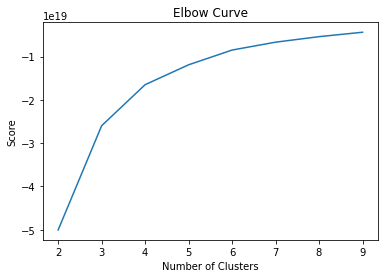

In [7]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## I went with 6 clusters here as that seems to be when the curve starts to flatten and has the smallest jump when going to 7

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 


In [9]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=6)

In [10]:
df['clusters'] = kmeans.fit_predict(df)

In [11]:
df.head()

,duration,usa_gross_income,worldwide_gross_income,metascore,avg_vote,clusters
0,181,858373000,2797800564,78,8.4,2
1,138,936662225,2068224036,80,7.9,2
2,149,678815482,2048359754,68,8.4,2
3,124,652270625,1670401444,59,7.0,2
4,118,543638043,1656963790,55,6.9,2


In [12]:
df['clusters'].value_counts()

0    2957
5     524
3     200
1      95
4      40
2       5
Name: clusters, dtype: int64

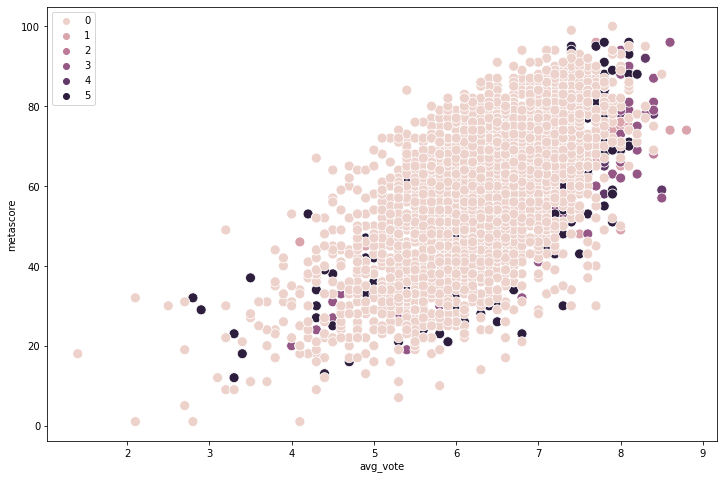

In [13]:
# Plot the clusters for the "Average Vote and "metascore" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_vote'], y=df['metascore'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('avg_vote') # Label x-axis.
plt.ylabel('metascore') # Label y-axis.
plt.show()

In [18]:
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'plum'
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 5, 'cluster'] = 'black'

In [19]:
df.groupby('cluster').agg({'avg_vote':['mean', 'median'], 
                         'metascore':['mean', 'median'], 
                         'usa_gross_income':['mean', 'median'],
                          'worldwide_gross_income':['mean', 'median'],
                           'duration':['mean','median']
                          })

avg_vote         metascore        usa_gross_income               \
                  mean median       mean median             mean       median   
cluster                                                                         
black         6.397328    6.4  52.927481   52.5     5.590540e+07   53947075.0   
dark purple   7.255000    7.3  65.425000   65.0     3.983129e+08  385970697.5   
light pink    6.282381    6.4  57.718634   59.0     4.417350e+06     185576.0   
light purple  7.027368    7.1  62.926316   64.0     2.302242e+08  217581231.0   
plum          6.661000    6.6  56.690000   57.0     1.182392e+08  117537238.0   
purple        7.720000    7.9  68.000000   68.0     7.339519e+08  678815482.0   

             worldwide_gross_income                  duration         
                               mean        median        mean median  
cluster                                                               
black                  1.289634e+08  1.179854e+08  110.080153  109.0  
dark purple            1.149494e+09  1.106308e+09  128.775000  130.0  
light pink             9.957161e+06  1.792414e+06  104.071356  101.0  
light purple           6.788647e+08  6.777184e+08  119.705263  121.0  
plum                   3.367286e+08  3.265944e+08  115.450000  113.0  
purple                 2.048350e+09  2.048360e+09  142.000000  138.0

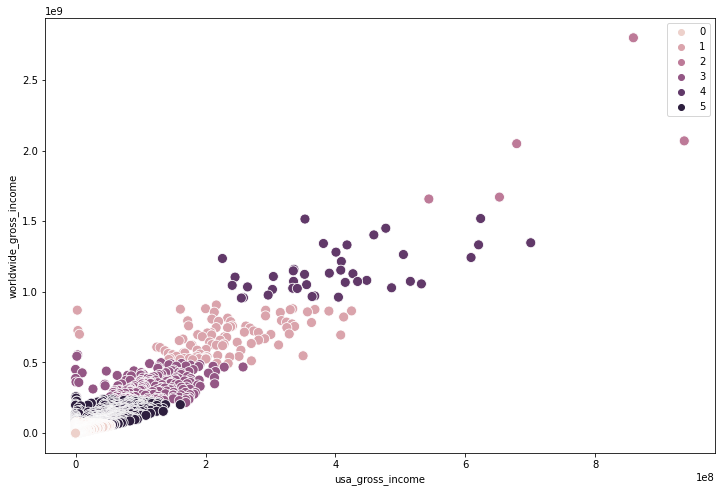

In [20]:
# Plot the clusters for the "Average Vote and "metascore" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['usa_gross_income'], y=df['worldwide_gross_income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('usa_gross_income') # Label x-axis.
plt.ylabel('worldwide_gross_income') # Label y-axis.
plt.show()

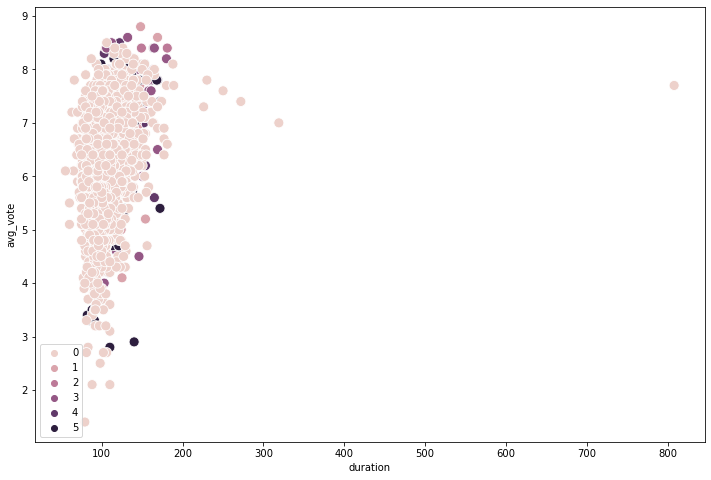

In [21]:
# Plot the clusters for the "Average Vote and "duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['duration'], y=df['avg_vote'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('duration') # Label x-axis.
plt.ylabel('avg_vote') # Label y-axis.
plt.show()

## I'm still not seeing too much difference between the results here and the results from the supervised machine learning. In the chart between the average vote and the duration, its interesting to see that titles with such a long duration tend to be highly rated. Not sure if this is due to the amount of time weeding out people who didn't like the movie and never finished it. 
## It is also interesting to see how many titles don't fall below 5 on the avg audience vote, esp when looking at the metascore and how low a lot of them scored overall. This might suggest that most movies have their fans despite how bad critics warn a movie might be. 

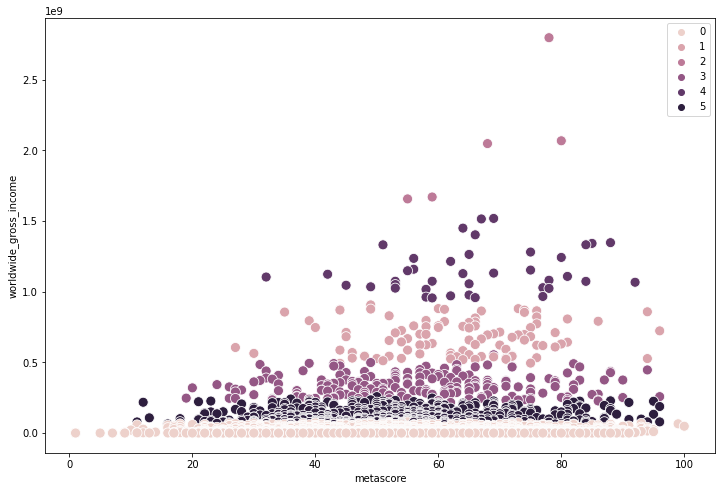

In [22]:
# Plot the clusters for the "Average Vote and "duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['metascore'], y=df['worldwide_gross_income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('metascore') # Label x-axis.
plt.ylabel('worldwide_gross_income') # Label y-axis.
plt.show()

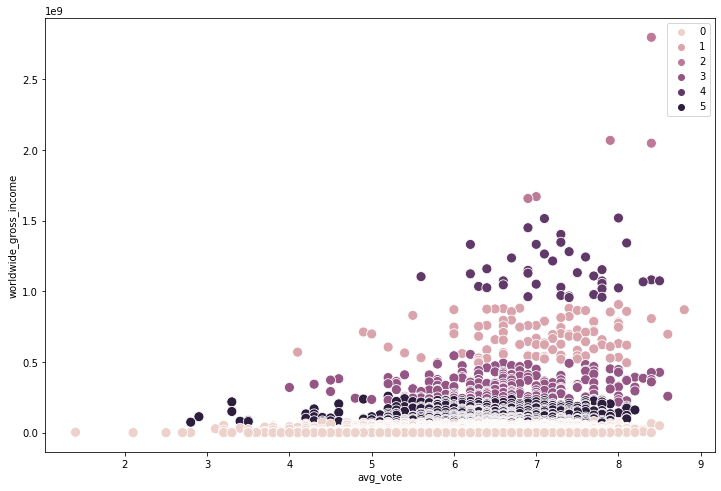

In [24]:
# Plot the clusters for the "Average Vote and "duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_vote'], y=df['worldwide_gross_income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('avg_vote') # Label x-axis.
plt.ylabel('worldwide_gross_income') # Label y-axis.
plt.show()